<h3> HW1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.seterr(invalid='ignore', over='ignore')  # suppress warning caused by division by inf

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
def f(x):
    return 1/(1 + np.exp(3*(x-3))) * 10 * x**2  + 1 / (1 + np.exp(-3*(x-3))) * (0.5*(x-10)**2 + 50)
def fprime(x):
    return 1 / (1 + np.exp((-3)*(x-3))) * (x-10) + 1/(1 + np.exp(3*(x-3))) * 20 * x + (3* np.exp(9))/(np.exp(9-1.5*x) + np.exp(1.5*x))**2 * ((0.5*(x-10)**2 + 50) - 10 * x**2) 

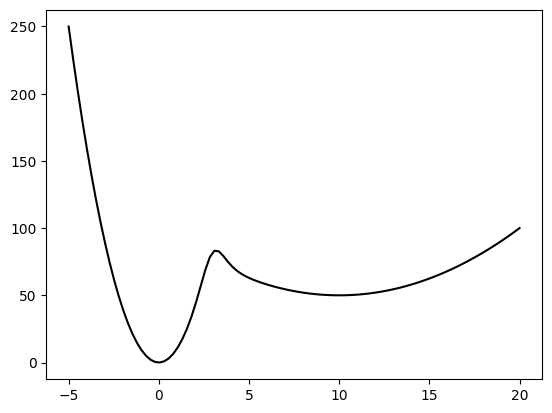

In [4]:
x = np.linspace(-5,20,100)
plt.plot(x,f(x), 'k')

<h3> Prob.4

In [13]:
def gradient_descent(alpha, x0, maxiter):
    x = x0
    for i in range(maxiter):
        x = x - alpha * fprime(x)
        if i == 0:
            plt.plot(x, f(x), 'ro', linestyle = '', markersize = 5, label = "GD")
        else:
            plt.plot(x, f(x), 'ro', linestyle = '', markersize = 5)
    return x

Gradient Descent method is implemented as above. We take the argument as the learning rate alpha, the initial point x0, and the maximum number of iterations maxiter. The algorithm runs the gradient descent process, and plots the trajectory of the gradient descent. The return value is the final converged value for the gradient descent.

In [15]:
def plot_gradient_descent(alpha, x0, maxiter):
    x_star = gradient_descent(alpha, x0, maxiter)
    plt.plot(x0, f(x0), 'bo', label = "x0")
    plt.plot(x, f(x), 'k')
    plt.legend()
    plt.show()
    print(f"converged to:{x_star}")

An helper method for visualizing the trajectory of the GD is implemented as above, and uses plt.plot() to do so.

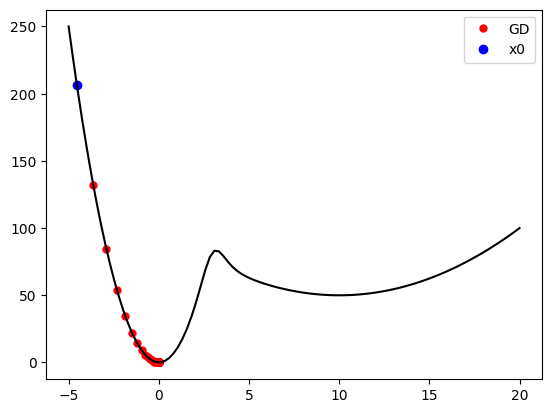

converged to:-0.001780002229631524


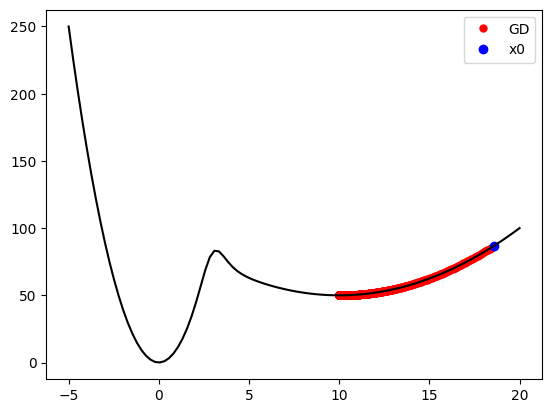

converged to:10.000372794950218


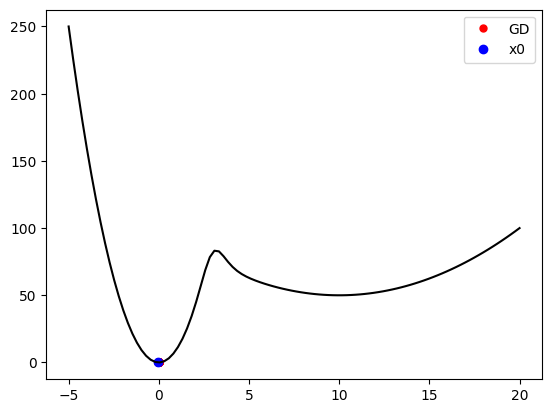

converged to:-0.001780002229631524


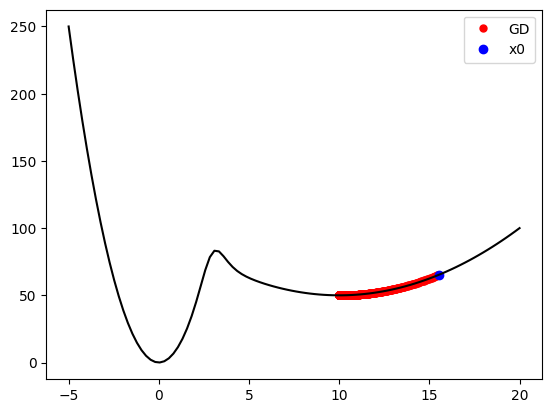

converged to:10.000241695603153


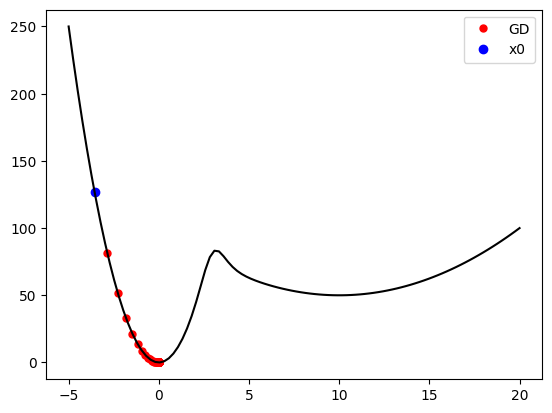

converged to:-0.001780002229631524


In [18]:
N = 1000 #number of iterations
alpha = 0.01

for _ in range(5):
    x0 = np.random.uniform(-5,20)
    plot_gradient_descent(alpha, x0, N)

Experiments are done for observing the GD trajectory, and we can observe that the converging point differs due to the starting point with the learning rate of 0.01. In some cases it converges to a point close to 0, and a point close to 10 for other cases. We can observe that a small learning rate can make the GD converge to the critical point close to the starting point, and also for the possibility to converge to a sharp minima.

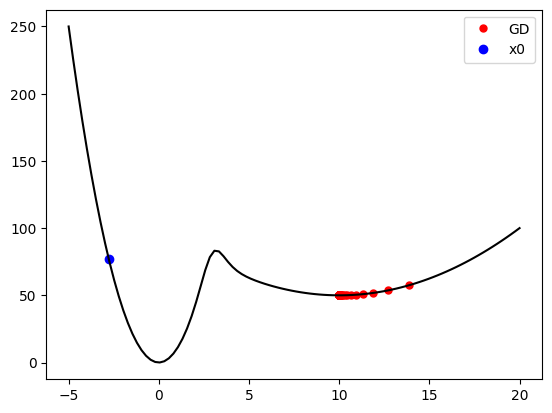

converged to:10.000002009367284


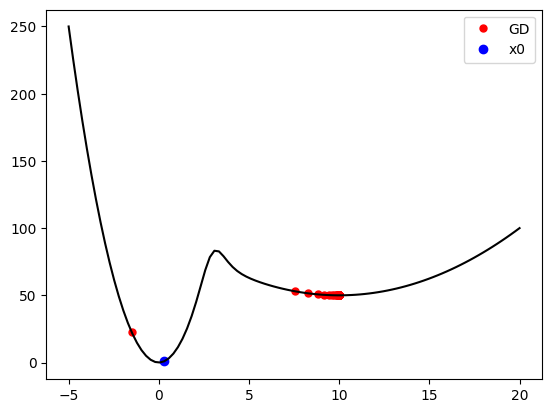

converged to:10.00000200936728


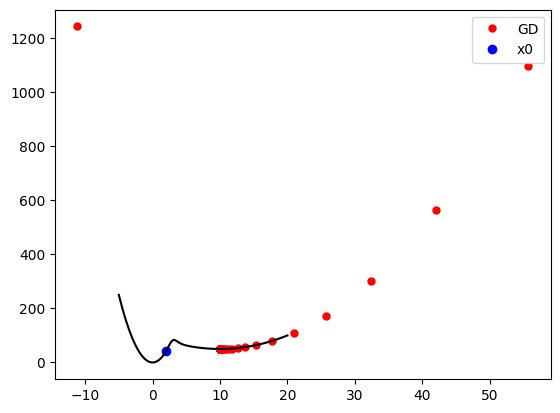

converged to:10.000002009367284


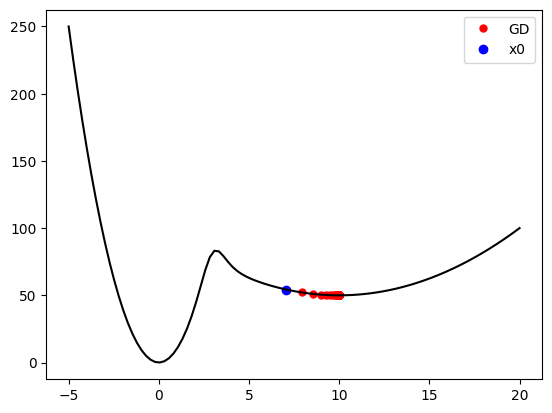

converged to:10.00000200936728


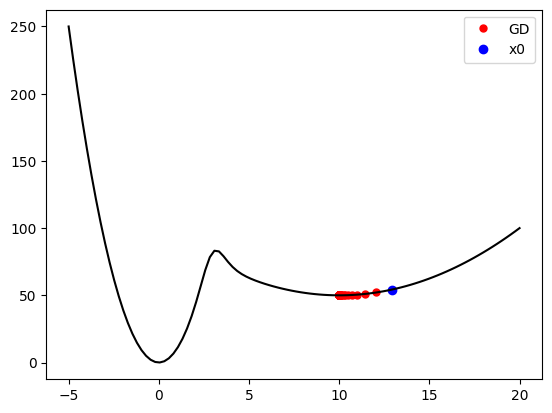

converged to:10.000002009367284


In [19]:
N = 1000 #number of iterations
alpha = 0.3

for _ in range(5):
    x0 = np.random.uniform(-5,20)
    plot_gradient_descent(alpha, x0, N)

In the case of the learning rate set to 0.3, we can observe that it converges to the point close to 10, the wide minima.

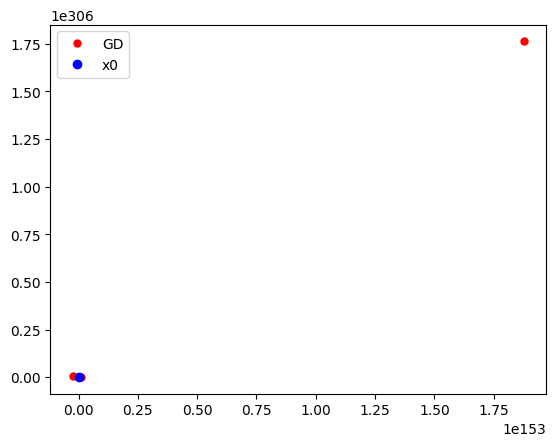

converged to:nan


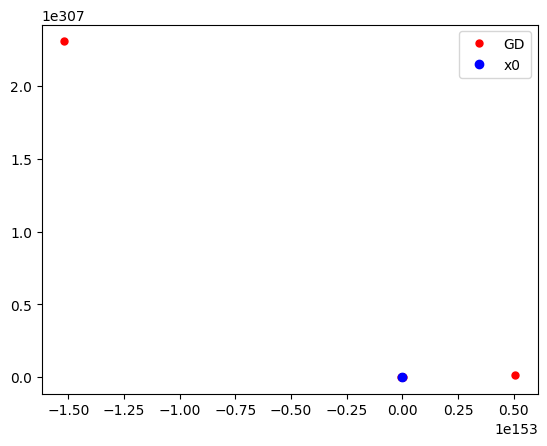

converged to:nan


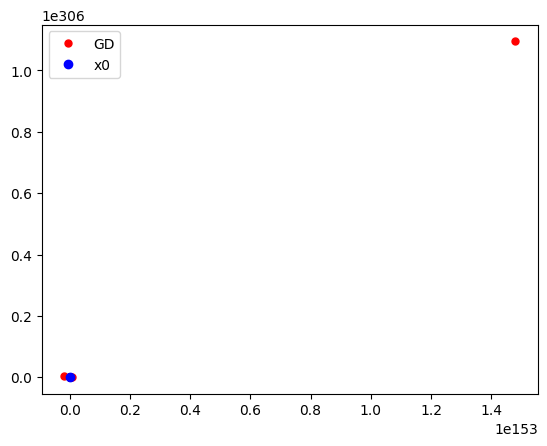

converged to:nan


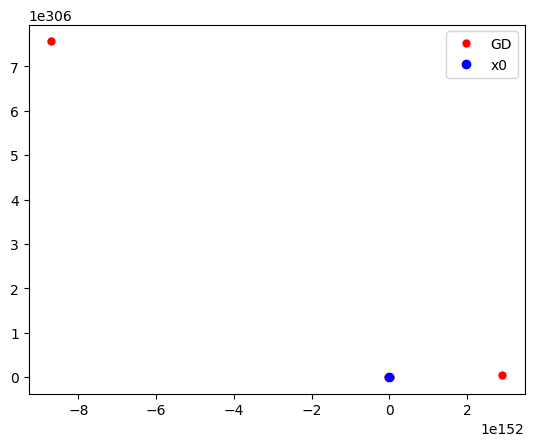

converged to:nan


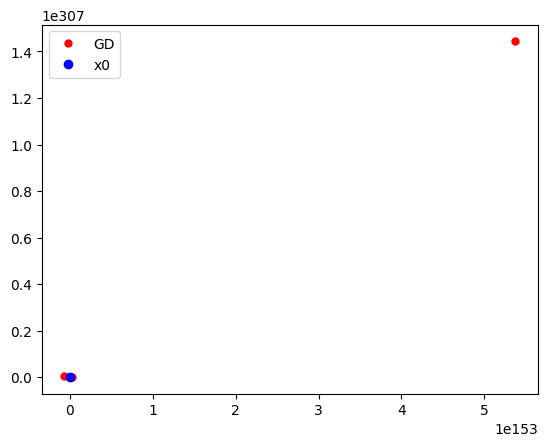

converged to:nan


In [20]:
N = 1000 #number of iterations
alpha = 4

for _ in range(5):
    x0 = np.random.uniform(-5,20)
    plot_gradient_descent(alpha, x0, N)

For a learning rate of 4, we can observe that it GD algorithm diverges. From all of these analyses, we can conclude that we should choose the learning rate carefully depending on the loss function we are working on.

<h3> Prob.5

In [44]:
def huber_loss(x) :
    return np.sum( (1/2)*(x**2)*(np.abs(x)<=1) + (np.sign(x)*x-1/2)*(np.abs(x)>1) )
def huber_grad(x) :
    return x*(np.abs(x)<=1) + np.sign(x)*(np.abs(x)>1)

In [61]:
class TransposedConvolution1d :
    '''
    Transpose of 1-dimensional convolution operator used for the 
    transpose-convolution operation A.T@(...)
    '''
    def __init__(self, filt: np.ndarray) :
        self.__filt = filt
        self.__r = filt.size

    def __matmul__(self, vector: np.ndarray) :
        r = self.__r
        n = vector.size + r - 1

        reversed_filt = self.__filt[::-1]
        # return np.asarray([np.dot(vector[max(0, i-(r-1)) : min(n-r+1, i+1)], self.__filt[max(0, i-(n-r)) : min(r, i+1)][::-1]) for i in range(n)])
        return np.asarray([np.dot(vector[max(0, i-(r-1)) : min(n-r+1, i+1)], reversed_filt[max(0, r-1-i) : min(r, n-i)]) for i in range(n)])

The __matmul__ method is implemented as above. The filter is first reversed, and the return value is calculated via list comprehension. np.dot and list slicing is used to only calculate the inner product of the vectors with many 0s efficiently.

In [62]:
class Convolution1d :
    def __init__(self, filt: np.ndarray) :
        self.__filt = filt
        self.__r = filt.size
        self.T = TransposedConvolution1d(self.__filt)

    def __matmul__(self, vector: np.ndarray) :
        if(vector.ndim != 1) :
            raise ValueError("vector must be 1-dimensional")
        
        r, n = self.__r, vector.size
        return np.asarray([np.dot(vector[i : i+r], self.__filt) for i in range(n-r+1)])

Here the __matmul__ function is implemented as just a matrix - vector multiplication using the list comprehension for the nonzero terms of the full matrix. Also, the __matmul__ function is implemented to raise an error for the case where the multiplication is held for a tensor with ndim ${\ge}$ 2.

In [63]:
r, n, lam = 3, 20, 0.1

np.random.seed(0)
k = np.random.randn(r)
b = np.random.randn(n-r+1)
A = Convolution1d(k)

x = np.zeros(n)
alpha = 0.01
for _ in range(100) :
    x = x - alpha*(A.T@(huber_grad(A@x-b))+lam*x)

print(huber_loss(A@x-b)+0.5*lam*np.linalg.norm(x)**2)

0.4587586843129764
